In [1]:

!pip install Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.8 MB/s eta 0:00:00


In [4]:



import pandas as pd
import numpy as np
import random
from faker import Faker
from google.colab import files

# STEP 3: Upload Excel file
print("  upload  'Departments Roles and Salaries.xlsx'")
uploaded = files.upload()
excel_file = list(uploaded.keys())[0]

# STEP 4: Set seed
Faker.seed(42)
random.seed(42)
np.random.seed(42)

# STEP 5: Read both sheets
departments_df = pd.read_excel(excel_file, sheet_name=0)
roles_df = pd.read_excel(excel_file, sheet_name=1)

roles_df.columns = [col.strip() for col in roles_df.columns]
departments_df.columns = [col.strip() for col in departments_df.columns]

departments_df['% of employees'] = departments_df['% of employees'].astype(str).str.replace('%', '').astype(float)

departments_df['weight'] = departments_df['% of employees'] / departments_df['% of employees'].sum()


departments = departments_df['Department'].tolist()
weights = departments_df['weight'].tolist()


n = 10000
faker_us = Faker('en_US')

country_distribution = {
    'USA': 60.0,
    'India': 17.0,
    'China': 11.8,
    'Mexico': 4.5,
    'Canada': 2.7,
    'Philippines': 1.8,
    'Taiwan': 1.2,
    'South Korea': 1.0
}
total = sum(country_distribution.values())
country_list = list(country_distribution.keys())
country_weights = [v / total for v in country_distribution.values()]

locale_map = {
    'USA': 'en_US', 'India': 'en_IN', 'China': 'zh_CN', 'Mexico': 'es_MX',
    'Canada': 'en_CA', 'Philippines': 'en_PH', 'Taiwan': 'zh_TW', 'South Korea': 'ko_KR'
}
locale_fakers = {c: Faker(locale_map[c]) for c in country_list}

employee_ids = np.arange(100000000, 100000000 + n)
country_choices = random.choices(country_list, weights=country_weights, k=n)
names, phones, emails = [], [], []

for c in country_choices:
    f = locale_fakers[c]
    names.append(f.name())
    emails.append(f.email())
    phones.append(faker_us.phone_number())


chosen_departments = random.choices(departments, weights=weights, k=n)
chosen_roles = []
salaries = []

for dept in chosen_departments:
    role_subset = roles_df[roles_df['Department'] == dept]
    if not role_subset.empty:
        chosen = role_subset.sample(1).iloc[0]
        chosen_roles.append(chosen['Role'])
        salary = random.randint(int(chosen['Lower']), int(chosen['Upper']))
        salaries.append(salary)
    else:
        chosen_roles.append("Unassigned")
        salaries.append(0)


emp_df = pd.DataFrame({
    'employeeID': employee_ids,
    'CountryOfBirth': country_choices,
    'name': names,
    'phone': phones,
    'email': emails,
    'department': chosen_departments,
    'role': chosen_roles,
    'salary': salaries
})


print(" emp_df.head(10):")
display(emp_df.head(10))

print(" emp_df.describe(include='all'):")
display(emp_df.describe(include='all'))

total_payroll = emp_df['salary'].sum()
print(f"\n Total Yearly Payroll: ${total_payroll:,.2f}")


  upload  'Departments Roles and Salaries.xlsx'


Saving Departments Roles and Salaries.xlsx to Departments Roles and Salaries (2).xlsx
 emp_df.head(10):


,employeeID,CountryOfBirth,name,phone,email,department,role,salary
0,100000000,India,Aryan Maharaj,581-296-0013,udantdewan@example.net,Legal,Legal Operations,157791
1,100000001,USA,Michelle Miles,3268542351,lrobinson@example.com,Human Resources,Senior Recruiter,120367
2,100000002,USA,Ryan Munoz,584-695-9310,blairamanda@example.com,Customer Support,Customer Support Representative,56377
3,100000003,USA,Dr. Sharon James,(653)541-9283x276,xreid@example.org,Customer Support,Customer Support Representative,63287
4,100000004,India,Daksh Karnik,639-453-7672,muttinandini@example.com,Engineering,Full-Stack Engineer,132216
5,100000005,India,Adya Sangha,671.201.2269x16697,opathak@example.org,Administrative,IT Services Administrative Assistant,61280
6,100000006,Mexico,Omar Jaramillo Molina,704.482.8148x932,lozadamanuel@example.org,Legal,Legal Operations,116691
7,100000007,USA,Paula Moreno,(443)903-9117x182,georgetracy@example.org,Sales,Sales Development Rep,70406
8,100000008,USA,Carmen Rose,001-734-265-7871x331,ibrandt@example.net,Marketing,Marketing Manager,95097
9,100000009,USA,Crystal Robinson,4519834738,zimmermanbrian@example.org,Engineering,Frontend Engineer,105044


 emp_df.describe(include='all'):


,employeeID,CountryOfBirth,name,phone,email,department,role,salary
count,1.000000e+04,10000,10000,10000,10000,10000,10000,10000.000000
unique,NaN,8,9592,10000,9871,11,75,NaN
top,NaN,USA,James Jones,(818)826-0176x2222,jamessmith@example.com,Engineering,Backend Engineer,NaN
freq,NaN,5957,4,1,3,2980,531,NaN
mean,1.000050e+08,NaN,NaN,NaN,NaN,NaN,NaN,157153.895500
std,2.886896e+03,NaN,NaN,NaN,NaN,NaN,NaN,84703.503262
min,1.000000e+08,NaN,NaN,NaN,NaN,NaN,NaN,35072.000000
25%,1.000025e+08,NaN,NaN,NaN,NaN,NaN,NaN,96930.250000
50%,1.000050e+08,NaN,NaN,NaN,NaN,NaN,NaN,134655.500000
75%,1.000075e+08,NaN,NaN,NaN,NaN,NaN,NaN,209598.750000



 Total Yearly Payroll: $1,571,538,955.00


In [5]:
!pip install pandas openpyxl faker matplotlib seaborn --quiet

### A. Country of Birth Counts

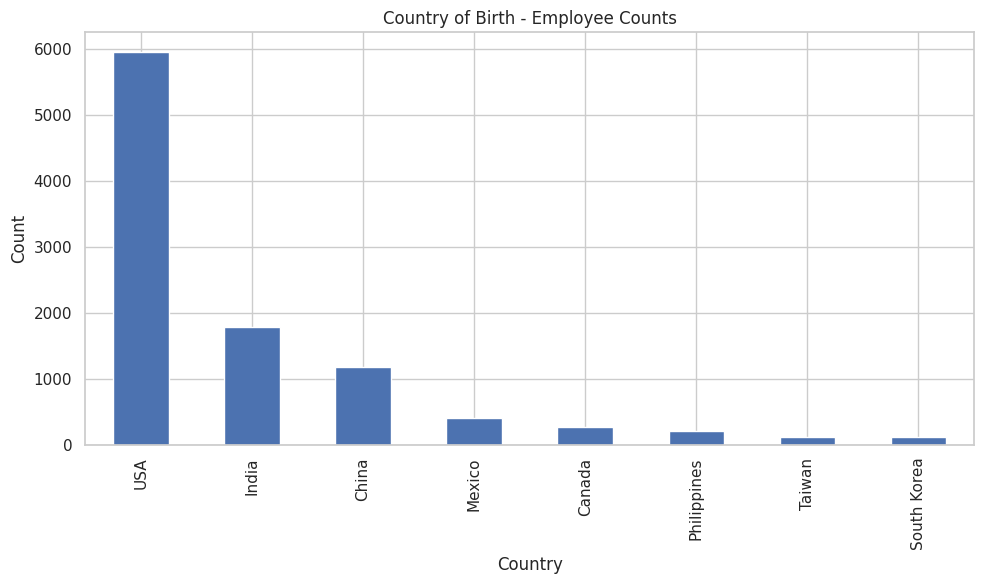

### B. Department Employee Counts

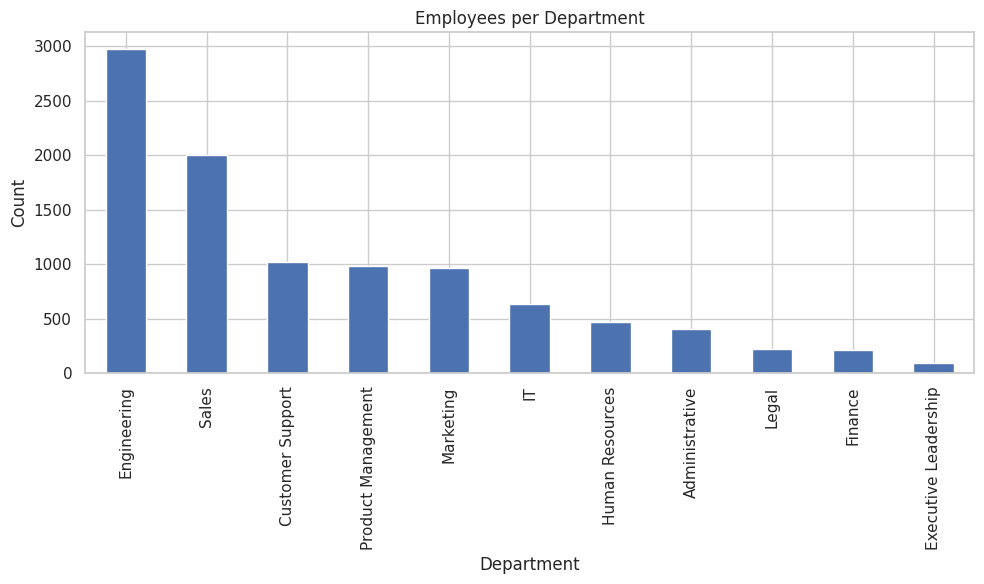

### C. Hires by Day of the Week

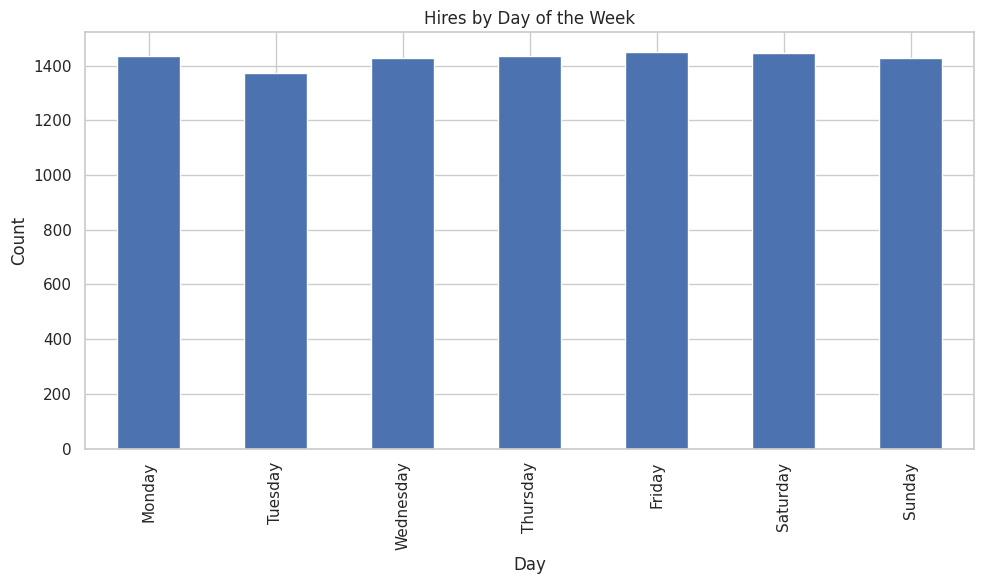

### D. KDE Plot of Salaries

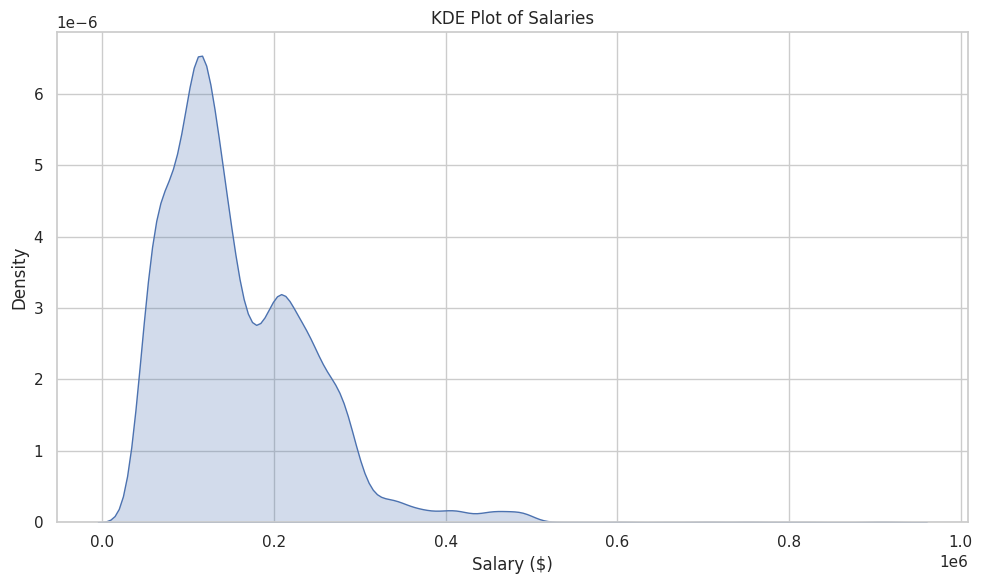

### E. Employees by Birth Year

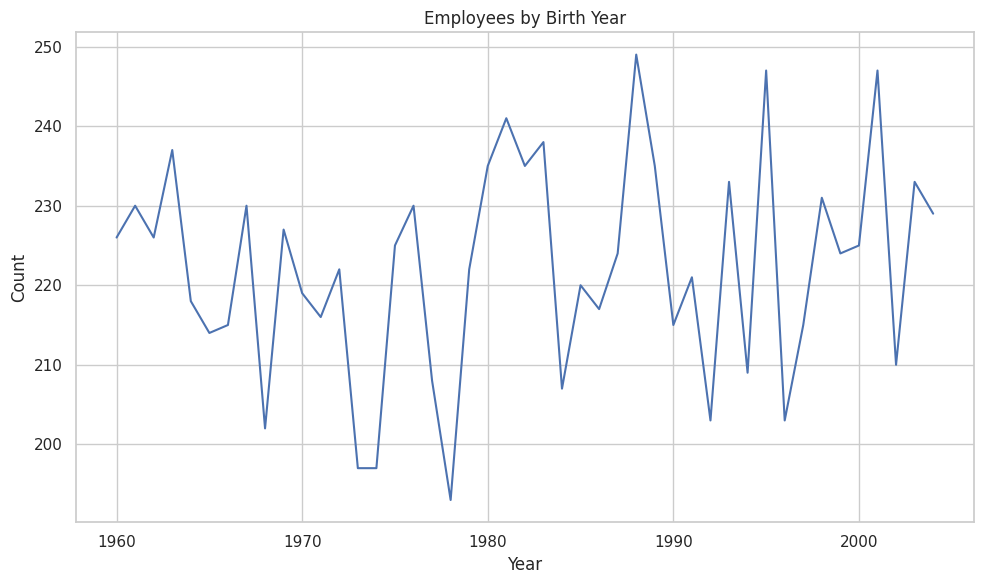

### F. Salary Distribution by Department (KDE)

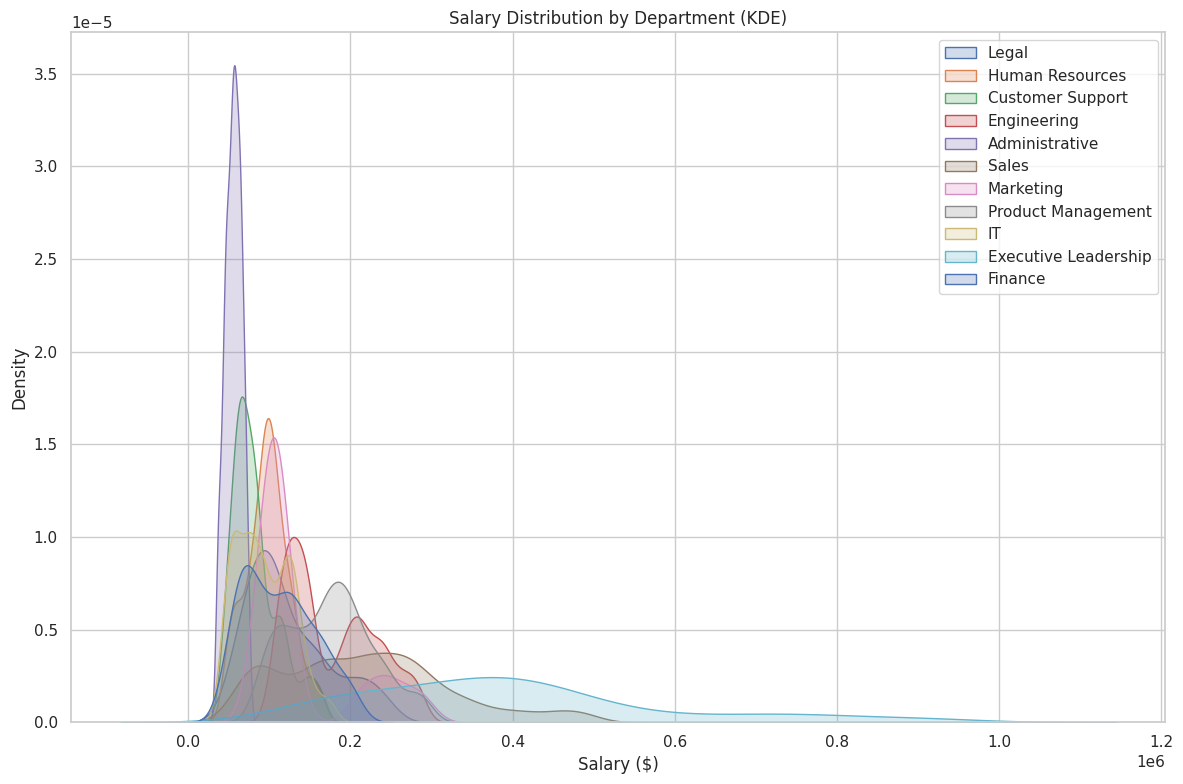

In [7]:
# VISUALIZATION TASK ONLY: A to F Plots for emp_df (with hiredate generation)

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from datetime import datetime
import numpy as np
import random

# Ensure hiredate column exists
if 'hiredate' not in emp_df.columns:
    if 'birthdate' not in emp_df.columns:
        birth_years = np.random.randint(datetime.now().year - 65, datetime.now().year - 20, size=len(emp_df))
        emp_df['birthdate'] = [datetime(year, random.randint(1, 12), random.randint(1, 28)) for year in birth_years]

    hiredates = []
    for bd in emp_df['birthdate']:
        min_hire_year = max(bd.year + 20, 2010)
        year = random.randint(min_hire_year, datetime.now().year)
        hiredates.append(datetime(year, random.randint(1, 12), random.randint(1, 28)))
    emp_df['hiredate'] = hiredates

# A. Country of Birth Bar Chart
display(Markdown("### A. Country of Birth Counts"))
plt.figure(figsize=(10,6))
emp_df['CountryOfBirth'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title("Country of Birth - Employee Counts")
plt.xlabel("Country")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("plot_A_country.png")
plt.show()

# B. Department Bar Chart
display(Markdown("### B. Department Employee Counts"))
plt.figure(figsize=(10,6))
emp_df['department'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title("Employees per Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("plot_B_department.png")
plt.show()

# C. Hire Day of the Week
display(Markdown("### C. Hires by Day of the Week"))
emp_df['hire_day'] = emp_df['hiredate'].dt.day_name()
plt.figure(figsize=(10,6))
emp_df['hire_day'].value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).plot(kind='bar')
plt.title("Hires by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("plot_C_hireday.png")
plt.show()

# D. KDE plot of salaries
display(Markdown("### D. KDE Plot of Salaries"))
plt.figure(figsize=(10,6))
sns.kdeplot(emp_df['salary'], fill=True)
plt.title("KDE Plot of Salaries")
plt.xlabel("Salary ($)")
plt.tight_layout()
plt.savefig("plot_D_kde_salary.png")
plt.show()

# E. Birth Year Line Plot
display(Markdown("### E. Employees by Birth Year"))
emp_df['birth_year'] = emp_df['birthdate'].dt.year
plt.figure(figsize=(10,6))
emp_df['birth_year'].value_counts().sort_index().plot(kind='line')
plt.title("Employees by Birth Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("plot_E_birth_year.png")
plt.show()

# F. KDE plots of salary by department
display(Markdown("### F. Salary Distribution by Department (KDE)"))
plt.figure(figsize=(12,8))
for dept in emp_df['department'].unique():
    sns.kdeplot(emp_df[emp_df['department'] == dept]['salary'], label=dept, fill=True)
plt.title("Salary Distribution by Department (KDE)")
plt.xlabel("Salary ($)")
plt.legend()
plt.tight_layout()
plt.savefig("plot_F_kde_dept.png")
plt.show()

In [8]:
from datetime import datetime


if 'age' not in emp_df.columns:
    emp_df['age'] = emp_df['birthdate'].apply(lambda x: datetime.now().year - x.year)


weights = emp_df['age'].apply(lambda a: 3 if 40 <= a <= 49 else 1)


smpl_df = emp_df.sample(n=500, weights=weights, random_state=42)

print("smpl_df.head(10):")
display(smpl_df.head(10))

print("\nsmpl_df.describe(include='all'):")
display(smpl_df.describe(include='all'))


smpl_df.head(10):


,employeeID,CountryOfBirth,name,phone,email,department,role,salary,birthdate,hiredate,hire_day,birth_year,age
3786,100003786,USA,Dana Hanson DDS,743-583-9750,timothyoliver@example.net,Engineering,Senior Software Engineer,185179,1983-12-16,2012-08-24,Friday,1983,42
9497,100009497,USA,Melissa Brandt,001-434-213-2613x84558,jacksonamy@example.com,Marketing,VP of Marketing,234301,1983-04-06,2024-10-27,Sunday,1983,42
7343,100007343,USA,James Olson,624-417-0013x732,banksclifford@example.net,Marketing,Senior Marketing Manager,110146,1984-10-27,2012-12-14,Friday,1984,41
6013,100006013,China,谢秀云,001-433-531-7361,pingzhao@example.org,Administrative,General Administrative Assistant,47001,2004-04-22,2025-08-25,Monday,2004,21
1595,100001595,USA,John Moore,(228)737-7427,dwilliams@example.net,Sales,Account Executive,111773,1999-11-19,2024-07-15,Monday,1999,26
575,100000575,China,李凤英,607.705.7836x091,jing77@example.org,Engineering,Lead Software Engineer,217458,1965-04-19,2012-09-19,Wednesday,1965,60
8665,100008665,India,Lopa Nagar,+1-380-558-2888x9041,nicholasacharya@example.com,Product Management,VP of Product,263329,1995-02-16,2018-08-01,Wednesday,1995,30
6032,100006032,India,Vasatika Tailor,327.410.6795x1787,karanekapad@example.org,Engineering,Backend Engineer,149739,1981-12-08,2019-08-18,Sunday,1981,44
7108,100007108,China,汪玲,+1-545-399-3423x459,flin@example.net,Customer Support,Director of Customer Support,132685,1982-02-02,2023-11-02,Thursday,1982,43
203,100000203,USA,Kelly Johnson,001-524-842-0438x05719,brianbrown@example.com,IT,IT Manager,95182,1976-01-03,2022-05-21,Saturday,1976,49



smpl_df.describe(include='all'):


,employeeID,CountryOfBirth,name,phone,email,department,role,salary,birthdate,hiredate,hire_day,birth_year,age
count,5.000000e+02,500,500,500,500,500,500,500.000000,500,500,500,500.00000,500.00000
unique,NaN,8,498,500,500,11,67,NaN,NaN,NaN,7,NaN,NaN
top,NaN,USA,James Olson,+1-927-877-3177x859,rpayne@example.com,Engineering,Principal Software Engineer,NaN,NaN,NaN,Wednesday,NaN,NaN
freq,NaN,297,2,1,1,132,28,NaN,NaN,NaN,83,NaN,NaN
mean,1.000050e+08,NaN,NaN,NaN,NaN,NaN,NaN,153668.642000,1983-07-16 08:15:21.600000,2018-11-14 22:47:59.999999744,NaN,1983.05400,41.94600
min,1.000000e+08,NaN,NaN,NaN,NaN,NaN,NaN,37668.000000,1960-02-05 00:00:00,2010-01-08 00:00:00,NaN,1960.00000,21.00000
25%,1.000025e+08,NaN,NaN,NaN,NaN,NaN,NaN,90639.250000,1976-10-10 00:00:00,2015-04-28 18:00:00,NaN,1976.00000,33.00000
50%,1.000052e+08,NaN,NaN,NaN,NaN,NaN,NaN,132347.000000,1982-08-04 00:00:00,2018-12-20 00:00:00,NaN,1982.00000,43.00000
75%,1.000076e+08,NaN,NaN,NaN,NaN,NaN,NaN,210107.500000,1992-06-29 06:00:00,2022-11-08 06:00:00,NaN,1992.00000,49.00000
max,1.000099e+08,NaN,NaN,NaN,NaN,NaN,NaN,659229.000000,2004-12-24 00:00:00,2025-12-25 00:00:00,NaN,2004.00000,65.00000


In [9]:
import numpy as np
from IPython.display import display

std_dev = emp_df['salary'].mean() * 0.1


noise = np.random.normal(loc=0, scale=std_dev, size=len(emp_df))


perturbed_salaries = emp_df['salary'] + noise
perturbed_salaries = np.clip(perturbed_salaries, a_min=0, a_max=None)


prtrb_df = emp_df.copy()
prtrb_df['salary'] = perturbed_salaries.round(2)

print("prtrb_df.head(10):")
display(prtrb_df.head(10))

print("\nprtrb_df.describe(include='all'):")
display(prtrb_df.describe(include='all'))


prtrb_df.head(10):


,employeeID,CountryOfBirth,name,phone,email,department,role,salary,birthdate,hiredate,hire_day,birth_year,age
0,100000000,India,Aryan Maharaj,581-296-0013,udantdewan@example.net,Legal,Legal Operations,151345.02,1990-02-13,2016-04-28,Thursday,1990,35
1,100000001,USA,Michelle Miles,3268542351,lrobinson@example.com,Human Resources,Senior Recruiter,103436.18,1966-08-23,2011-10-15,Saturday,1966,59
2,100000002,USA,Ryan Munoz,584-695-9310,blairamanda@example.com,Customer Support,Customer Support Representative,39855.47,1981-09-16,2010-02-20,Saturday,1981,44
3,100000003,USA,Dr. Sharon James,(653)541-9283x276,xreid@example.org,Customer Support,Customer Support Representative,36054.76,1964-02-19,2015-05-15,Friday,1964,61
4,100000004,India,Daksh Karnik,639-453-7672,muttinandini@example.com,Engineering,Full-Stack Engineer,138549.69,1996-03-27,2023-01-21,Saturday,1996,29
5,100000005,India,Adya Sangha,671.201.2269x16697,opathak@example.org,Administrative,IT Services Administrative Assistant,46579.81,1960-07-04,2024-06-04,Tuesday,1960,65
6,100000006,Mexico,Omar Jaramillo Molina,704.482.8148x932,lozadamanuel@example.org,Legal,Legal Operations,116145.33,1965-06-10,2022-03-04,Friday,1965,60
7,100000007,USA,Paula Moreno,(443)903-9117x182,georgetracy@example.org,Sales,Sales Development Rep,67550.16,2004-09-16,2024-10-17,Thursday,2004,21
8,100000008,USA,Carmen Rose,001-734-265-7871x331,ibrandt@example.net,Marketing,Marketing Manager,80300.07,1963-11-05,2023-04-13,Thursday,1963,62
9,100000009,USA,Crystal Robinson,4519834738,zimmermanbrian@example.org,Engineering,Frontend Engineer,81111.04,1989-01-28,2024-09-22,Sunday,1989,36



prtrb_df.describe(include='all'):


,employeeID,CountryOfBirth,name,phone,email,department,role,salary,birthdate,hiredate,hire_day,birth_year,age
count,1.000000e+04,10000,10000,10000,10000,10000,10000,10000.000000,10000,10000,10000,10000.000000,10000.000000
unique,NaN,8,9592,10000,9871,11,75,NaN,NaN,NaN,7,NaN,NaN
top,NaN,USA,James Jones,(818)826-0176x2222,jamessmith@example.com,Engineering,Backend Engineer,NaN,NaN,NaN,Friday,NaN,NaN
freq,NaN,5957,4,1,3,2980,531,NaN,NaN,NaN,1450,NaN,NaN
mean,1.000050e+08,NaN,NaN,NaN,NaN,NaN,NaN,157036.349954,1982-08-11 16:47:42.720000,2019-03-02 00:14:58.559999744,NaN,1982.113200,42.886800
min,1.000000e+08,NaN,NaN,NaN,NaN,NaN,NaN,4424.180000,1960-01-01 00:00:00,2010-01-01 00:00:00,NaN,1960.000000,21.000000
25%,1.000025e+08,NaN,NaN,NaN,NaN,NaN,NaN,95500.960000,1971-04-10 12:00:00,2015-05-11 00:00:00,NaN,1971.000000,32.000000
50%,1.000050e+08,NaN,NaN,NaN,NaN,NaN,NaN,136389.390000,1982-09-23 00:00:00,2019-10-09 00:00:00,NaN,1982.000000,43.000000
75%,1.000075e+08,NaN,NaN,NaN,NaN,NaN,NaN,210113.615000,1993-11-22 12:00:00,2023-04-12 06:00:00,NaN,1993.000000,54.000000
max,1.000100e+08,NaN,NaN,NaN,NaN,NaN,NaN,901637.930000,2004-12-28 00:00:00,2025-12-28 00:00:00,NaN,2004.000000,65.000000


In [14]:

!pip install ydata-profiling --quiet


from ydata_profiling import ProfileReport

profile = ProfileReport(emp_df, title="Employee Data Profile", explorative=True)
profile.to_file("profile.html")



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:01<00:00, 12.99it/s]
/usr/local/lib/python3.11/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[6 1 4 ... 0 5 7]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:

emp_df.to_csv("emp_df.csv", index=False)

from google.colab import files
files.download("emp_df.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>